# Homework 2 - Introduction to Data Science - Fall 2021

## Guidelines
- Answer in the Markdown or code cells given below the questions.
- Comment code where appropriate for clarity.

# Problem 1
In the following exercise, we will perform Bayesian inference to estimate a parameter $\lambda$ using data generated from an exponential distribution with the unknown parameter $\lambda$, i.e. $Y \sim Exponential(\lambda) $ with the exponential density function given by:

$$p(y_{i}|\lambda) = \lambda e^{-\lambda y_{i}}$$

where $\lambda> 0$.  We load the data below.

In [25]:
Y = [1.11659426, 0.14591992, 0.9003231 , 1.05267893, 0.59665315,
       0.62196716, 0.0501256 , 2.2569046 , 0.59176357, 0.27908501,
       0.09001983, 0.05302138, 0.19794783, 0.71657887, 0.94523602,
       0.44210873, 0.17189032, 0.4104458 , 0.30163634, 1.0564698 ,
       0.15813088, 1.57609817, 0.62982101, 0.37747863, 0.10139393,
       2.44308245, 0.52684559, 0.73786292, 0.21034834, 0.44559072,
       0.16346868, 0.51826629, 0.0785872 , 0.21773059, 0.14507205,
       0.26167145, 1.30119327, 0.00881093, 0.77196405, 0.96493311,
       0.57850034, 0.6733615 , 0.53110575, 2.84934561, 0.09835044,
       0.11307157, 1.3428276 , 0.1704228 , 0.41692473, 1.48197104,
       0.05143844, 0.2103084 , 0.33847738, 1.19901459, 0.13828761,
       0.56981701, 0.07084937, 0.63245193, 0.66973814, 0.23941691,
       0.1019617 , 0.77316563, 0.19573404, 0.54167001, 0.18553303,
       0.42725298, 0.59527454, 0.91323428, 0.7351151 , 0.65058701,
       0.0504051 , 0.45197308, 0.04504415, 0.28518144, 1.34887045,
       0.69967626, 0.23990762, 0.03207982, 0.00399789, 0.03258423,
       1.05381261, 0.08938671, 1.04649714, 0.1472991 , 0.02720062,
       0.01421303, 0.23445255, 0.95165048, 0.20992524, 0.19655135,
       0.64897642, 0.27907629, 1.21557848, 0.27363763, 0.29139022,
       0.40552119, 0.09628245, 0.09214942, 0.19160858, 0.41977512]

## 1.1
Assume a $\text{Gamma}(2,2)$ prior for the parameter $\lambda$. In a single plot, overlay the prior density of $\lambda$ and posterior density of $\lambda$ given the samples $Y$. Plot the densities over the interval $(0,6]$.

Hint: You may read more about the gamma distribution in [the SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html).

In [79]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# support
support = np.linspace(0.01, 6, 100)

# likelihood

likelihood = 

# prior
# add your code here
prior = 

# posterior
# add your code here

post = 

# plot
fig, ax = plt.subplots(1,1)
ax.plot(support, prior)
ax.plot(support, post)
ax.legend(labels=["prior", "posterior | data"]);

SyntaxError: invalid syntax (<ipython-input-79-091ec7eecd62>, line 15)

## 1.2 
Plot the density of $Gamma(2+length(Y),2+\sum_{y_i \in Y} y_i)$ and the posterior density of $\lambda$ we got in 1.1 over the interval $(0,6]$ separately. What can you conclude? Do the prior distribution and the posterior distribution belong to the same probability distribution family? 

In [27]:
# plot the given gamma distribution on the support
# add your code here

gvalue = 

ax1 = plt.subplot(2,1,1)
ax1.plot(support,gvalue, scale=1/(2+sum(Y))));
ax1.legend(labels=["Gamma"])
ax2 = plt.subplot(2,1,2)
ax2.plot(support, post,'r');
ax2.legend(labels=["posterior | data"])

SyntaxError: invalid syntax (<ipython-input-27-0e08a0f29f05>, line 4)

#### Answer:


## 1.3
In Bayesian statistics, if the posterior distribution $p(\theta | x)$ is in the same probability distribution family as the prior probability distribution $p(\theta)$, then the prior is called a conjugate prior for $p(\theta | x)$. So if given a conjugate prior, the posterior would be easy to identify. But in many cases, we do not have a conjugate prior. Usually, we would use Monte Carlo simulation methods.

Implement a Metropolis-Hastings algorithm to sample from the posterior distribution of $\lambda$ using the data $Y$. Use a normal distribution $\mathcal{N}(\lambda^{(i-1)},1/2)$ as the proposal distribution. Print the acceptance rate and estimate the probability that $\lambda$ is smaller than 2 using the samples.


In [28]:
# Metropolis-Hastings
np.random.seed(seed=553)

lbd_0 = 1  # initial value
m = 10000  # number of proposal samples
lbd = [lbd_0]   # list to store accepted samples


# add your code here



# compute the acceptance rate
acpt_rate = 

print('The acceptance rate of MH is {0:0.4f}'. format(acpt_rate))

# compute the estimated probability using the samples in "lbd"
estprob_MH = 

print('The estimated probability by MH is {0:0.4f}'. format(estprob_MH))

SyntaxError: invalid syntax (<ipython-input-28-927c8274fc62>, line 14)

## 1.4
Also, complete the code below for rejection sampling and compare the results of the MH sampling and the rejection sampling with the true value. Which sampling method is better based on the acceptance ratios and the probability estimations?

Hint: You can use $Gamma(2+length(Y),2+\sum_{y_i \in Y} y_i)$ to compute the true probability $P(\lambda<2)$.

In [29]:
#Rejection sampling

np.random.seed(seed=436)

M = 10**(-15)   # target density less than M times proposal density

S = stats.norm.rvs(size=10000, loc = 0, scale=2)   # proposal samples

# target function
def f(x):
    
    # add your code here

    values = 
    
    return values

#proposal function
g = stats.norm.pdf(S,loc = 1,scale=1)

#ratio
ratio = f(S)/g

#sampling
samples = S[stats.uniform.rvs(size=10000) <= ratio/M]

# compute the acceptancerate
acpt_rate =     # add your code here

print('The acceptance rate of rejection sampling is {0:0.4f}'. format(acpt_rate))


# estimating the probability
estprob_r =     # add your code here


print('The estimated probability by rejection sampling is {0:0.4f}'. format(estprob_r))

# compute the true probability
# add your code here

prob_t = 
print('The true probability is {0:0.4f}'. format(prob_t))

SyntaxError: invalid syntax (<ipython-input-29-d39edfc2c29e>, line 14)

### Answer:

# Problem 2
We load and preprocess the [breast cancer](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) dataset from sklearn.datasets. 

Read the description of the dataset. Note that the target is encoded as 0 for class "malignant" and "1" for class "benign".

In [30]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer_bunch = load_breast_cancer()
cancer_pred = pd.DataFrame(cancer_bunch['data'], columns=cancer_bunch['feature_names'])
cancer_targ = pd.DataFrame(cancer_bunch['target'], columns=["Class"])


scaler = StandardScaler()
cancer_pred = scaler.fit_transform(cancer_pred)

## 2.1
We will proceed to perform KNN classification. Split the dataset into separate training and test sets using a test size of 1/5 and random_state=636.

## 2.2
For K between 1 and 30 inclusive, create a plot of the mean accuracies of KNN from 4-fold cross validation on the **training set**. Which K you would pick based on the results?

/Users/bella/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/bella/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/bella/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/bella/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was 

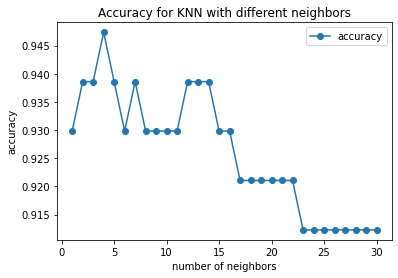

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error,confusion_matrix, r2_score, roc_curve, auc


# build K-NN classificaiton models for k between 1 and 30.
k = (range(1,31))
# list to store the average cross-validation accuracies
knn_score = []



for i in k:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    preds = knn_model.predict(X_test)
    accuracy = accuracy_score(preds,y_test)
    mse = mean_squared_error(preds,y_test)
    knn_score.append(accuracy)

# Plot
plt.plot(k, knn_score, "-o", label = "accuracy")
plt.xlabel('number of neighbors')
# Set the y axis label of the current axis.
plt.ylabel('accuracy')
# Set a title of the current axes.
plt.title('Accuracy for KNN with different neighbors')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### Answer:

## 2.4
For the K that you identified, print the accuracy and visualize the confusion matrix of the predictions on the test set of the KNN model.

accuracy score on test set: 0.9474


/Users/bella/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


TypeError: float() argument must be a string or a number, not 'ConfusionMatrixDisplay'

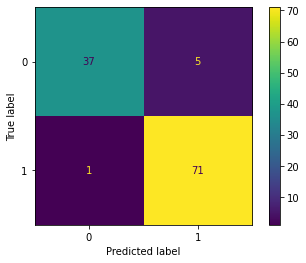

<Figure size 432x432 with 0 Axes>

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns 
from sklearn import metrics



#fit KNN to the training set with the K you pick and predict results on the test set

# add your code here
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)


#Report the accuracy scores on test set.
acc =   accuracy_score(knn_preds_n4,y_test) 

print('accuracy score on test set: {0:0.4f}'. format(acc))

#confusion matrix
cm_knn = metrics.plot_confusion_matrix(knn_model,X_test,y_test)

plt.figure(figsize=(6,6))

confusion_m = pd.DataFrame(data=cm_knn, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(confusion_m , annot=True, fmt='d', cmap='YlGnBu')

# Problem 3

Below we load NB.csv, which contains 2500 univariate observations, each of which are generated by one of two beta distributions. Recall that the density function for a $\text{Beta}(a, b)$ distribution is

$$f(x|a,b) = \begin{cases}\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} x^{a-1}(1-x)^{b-1} & 0 \leq x \leq 1 \\
0 & \text{otherwise}
\end{cases}$$

where $a,b>0$ and $\Gamma(\cdot)$ is the Gamma function. We are going to build a classification model to distinguish which of the two beta distribution each data point is coming from.

In [63]:
# load the data from NB.csv
NB = pd.read_csv("NB.csv")
display(NB)

,Feature,Class
0,0.851149,1
1,0.136934,0
2,0.781920,1
3,0.308707,0
4,0.791471,1
...,...,...
2495,0.096217,0
2496,0.142383,0
2497,0.767057,1
2498,0.803785,1


## 3.1
We know that each observation in our dataset is generated from one of two beta distributions, but we do not know the parameters of these distributions. To estimate these parameters, we will employ the following method-of-moments estimators:

\begin{align*}
\hat a = \bar x\left(\frac{\bar x(1-\bar x)}{s^2_x} - 1\right) \\\\
\hat b = (1-\bar x)\left(\frac{\bar x(1-\bar x)}{s^2_x} - 1\right)
\end{align*}

where $\bar x$ is sample mean, $s^2_x$ is **unbiased** sample variance.
  
Program a function `MOM_estimators(x)` that returns method-of-moments estimates of $a$ and $b$ given data `x` generated from a beta distribution.

In [68]:
def MOM_estimators(x):

    # add your code here
    
    a =  np.mean(x)*(np.mean(x)*(1-np.mean(x))/np.var(x)-1)
    b =  (1-np.mean(x))*(np.mean(x)*(1-np.mean(x))/np.var(x)-1)
    return(a, b)

## 3.2
Complete the code below for a Beta Naive Bayes classification by using MOM estimators. Apply the sample-weighted prior for the two beta distributions. Use [scipy.stats.beta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) for the beta distribution.
 
Hint: You can modify the codes for Gaussian Naive Bayes classification in lecture notes, but substitute the Gaussian density function by the Beta density function using MOM estimators for $a$ and $b$ in the formula.

In [ ]:
import scipy.stats as stats
# create a beta naive bayes function based on Method-of-Moments estimatior class
class beta_naive_bayes(object):
    # define estimate function to get needed parameters for gamma distribution
    def estimate(self, X, C):
        self.param = dict()# create param and will save parameters in it
        # calculate required parameters for different classes from training set
        for k in np.unique(C): # 0,1
            
            # add your code here

            self.param[k] = (prior, a, b) # set class k's parameters into self.param[k]
        return self
    
    # define prediction function to get predict result from test set T
    def prediction(self, T):
        k_pred = -1 * np.ones(T.size) # create an empty k_pred in advance for reserving prediction values
        # evaluate posterior for each point and find maximum
        for i in range(T.size): 

            # add your code here
            
        return k_pred

## 3.4
We proceed to perform classification on our data. Split the dataset into a training and test set using 4/5 as the test size and a random state of 436. Print the test set accuracy (correct predictions / total predictions).

In [69]:
# train_test_split
X, X_test, C, y_test = train_test_split(X, y, test_size = 4/5)

k_pred1 =  beta_naive_bayes().estimate(X, C).prediction(X_test)

# compute the accuracy
acc =      # add your code here

print('The accuracy on test set is {0:0.4f}'. format(acc))

SyntaxError: invalid syntax (<ipython-input-69-add7ca2e4a76>, line 7)

# Problem 4

We load the "Smarket.csv" dataset, which contains observations on the [S&P 500 stock market index](https://en.wikipedia.org/wiki/S%26P_500) from the beginning of 2001 until the end of 2005. The features in the dataset are as follows:

- Lag1 through Lag5: Percentage returns relative to each of the five previous trading days.
- Volume: Number of shares traded on the previous day in billions.
- Today: Percentage return on the trading day.
- Direction: Whether the market was up (2) or down (1) on the trading day.

In [53]:
import pandas as pd
smarket = pd.read_csv("Smarket.csv") ## Substitute appropriate filepath if necessary.
display(smarket)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,2
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,2
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,1
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,2
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,2
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,2
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,1
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,2
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,1


In this problem, we want to train classifers that use the index performance of the two previous day to predict the market direction on a trading day.

## 4.1 
Plot the sample features "Lag1" vs. "Lag2" in a scatterplot. Color the points by the market direction on the trading day.

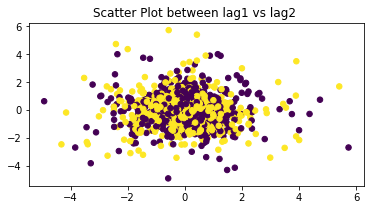

In [61]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
######################################
### Write your code starting from here

plt.figure(figsize=(6, 3)) 
plt.scatter(smarket['Lag1'], smarket['Lag2'], c = smarket['Direction'], marker = 'o', s = 30)
plt.title("Scatter Plot between lag1 vs lag2 ")
plt.show()


## 4.2
Create two objects of type `numpy.ndarray` called `X_train` and `y_train` based on the DataFrame `smarket` that 
represent a training set based on the performance of the two last days before the trading day, using only the data from years 2001 through 2004.

Furthermore, create two objects of type `numpy.ndarray` called `X_test` and `y_test` that represent a test set that includes all the trading days in the year 2005. 

In [78]:
import numpy as np
X_train = np.ndarray(smarket['Year']==[2001:2004])
y_train = np.ndarray(smarket['Year']==[2001:2004])
X_test = np.ndarray(smarket['Year']==[2005])
y_test = np.ndarray(smarket['Year']==[2005])

SyntaxError: invalid syntax (<ipython-input-78-ceb766777bc4>, line 2)

## 4.3
Fit classifiers that use linear discriminant analysis (LDA) and quadratic discriminant analysis (QDA) to predict the S&P 500 stock market index direction on the trading days of the year 2005 from the data of the years 2001 through 2004, using only the features selected in 4.2.

Print both the training and test accuracy for each model.

In [ ]:
QDA_model = QDA().fit(X_train,y_train)
y_predict_QDA = QDA_model.predict(X_test)
print('QDA Accuracy: ' + str(accuracy_score(y_predict_QDA,y_test)))


LDA_model = LDA().fit(X_train,y_train)
y_predict_LDA = LDA_model.predict(X_test)
print('LDA Accuracy: ' + str(accuracy_score(y_predict_LDA,y_test)))

## 4.4
For each model, plot a "classification_map" the visualizes the decision boundaries.

Hint: You may use parts of the code for the classification_map function of lectures 11–12.

In [ ]:
def classification_map(X,y,classifier,X_test=None,y_test=None,h=0.01,figsize=(10,10)):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    ######################################
    ### Write your code starting from here
